In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=20,10

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [5]:
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [6]:
import seaborn as sns

<AxesSubplot:>

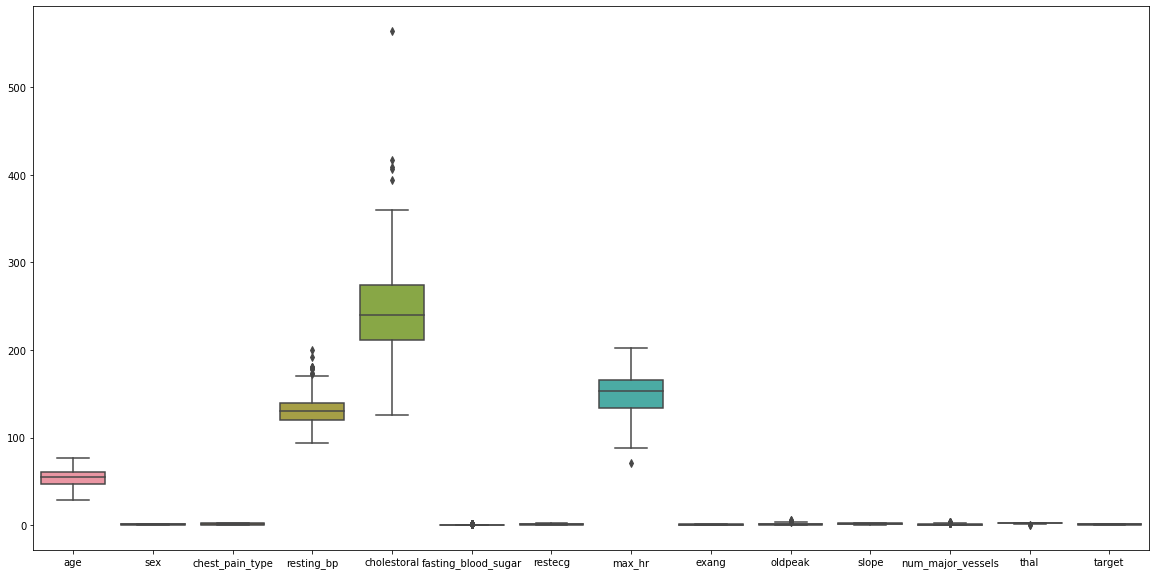

In [7]:
sns.boxplot(data=data)

In [8]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Outliers are present in resting_bp , cholestoral , max_hr

# Resting_bp

<AxesSubplot:>

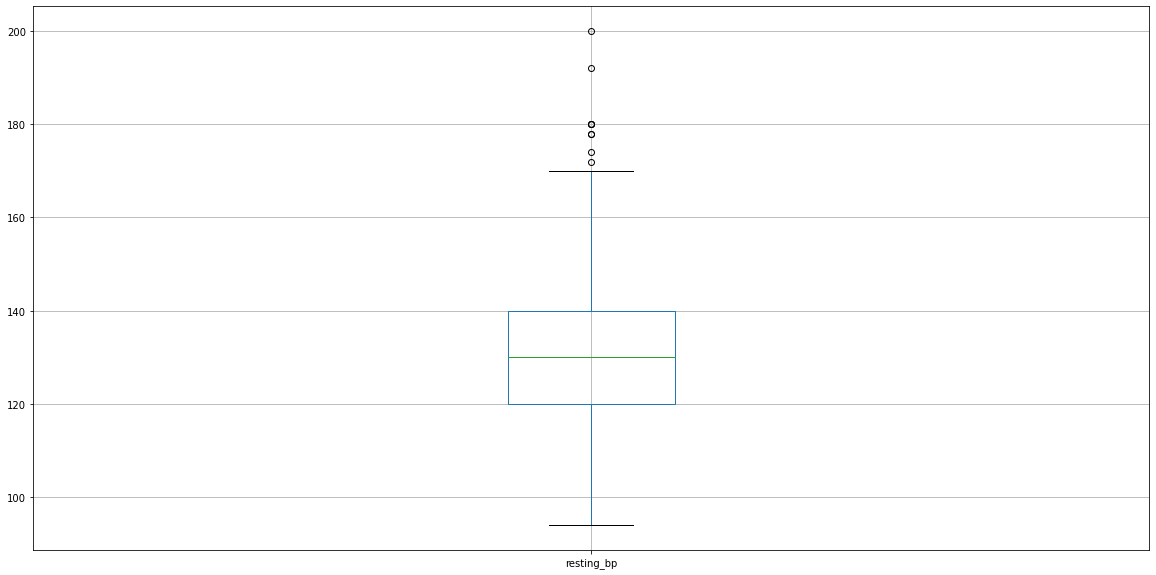

In [9]:
data.boxplot('resting_bp')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resting_bp', ylabel='Density'>

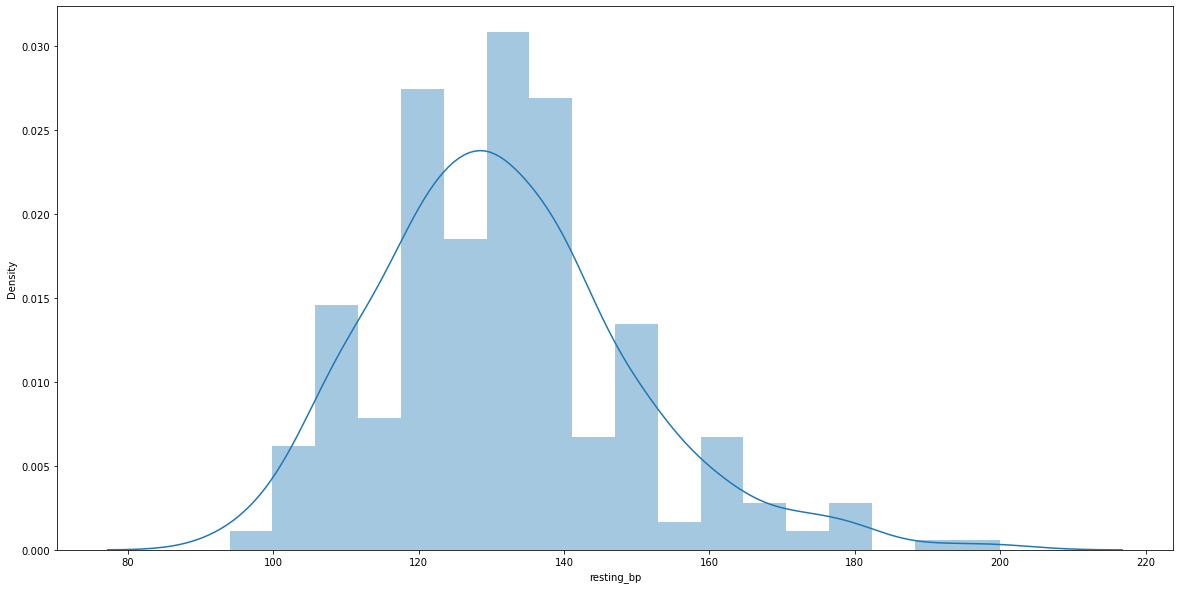

In [10]:
sns.distplot(data['resting_bp'])

gausian type distribution

In [11]:
data.resting_bp.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_bp, dtype: float64

In [12]:
upper_limit_1=data.resting_bp.mean() + 3*data.resting_bp.std()

In [13]:
upper_limit_1

184.23819081678892

In [14]:
lower_limit_1=data.resting_bp.mean() - 3*data.resting_bp.std()

In [15]:
lower_limit_1

79.00933393568636

In [16]:
data.loc[data.resting_bp>upper_limit_1]=data.resting_bp.mean()
data.loc[data.resting_bp<lower_limit_1]=data.resting_bp.mean()

In [17]:
data.resting_bp.describe()

count    303.000000
mean     131.198837
std       16.728827
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_bp, dtype: float64

<AxesSubplot:>

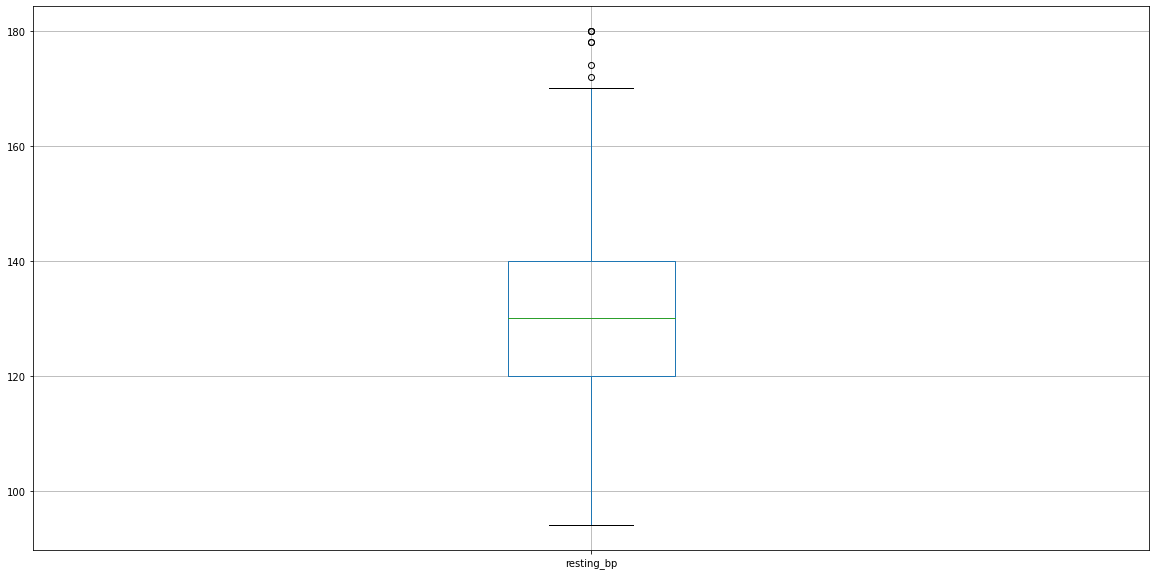

In [18]:
data.boxplot('resting_bp')

# Cholestoral

<AxesSubplot:>

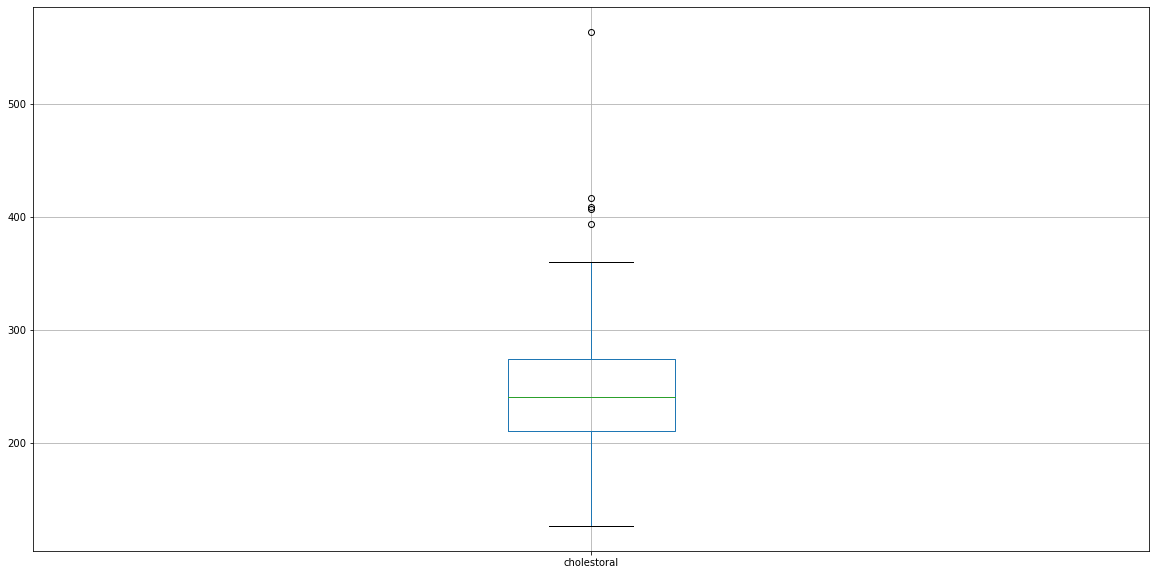

In [19]:
data.boxplot('cholestoral')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cholestoral', ylabel='Density'>

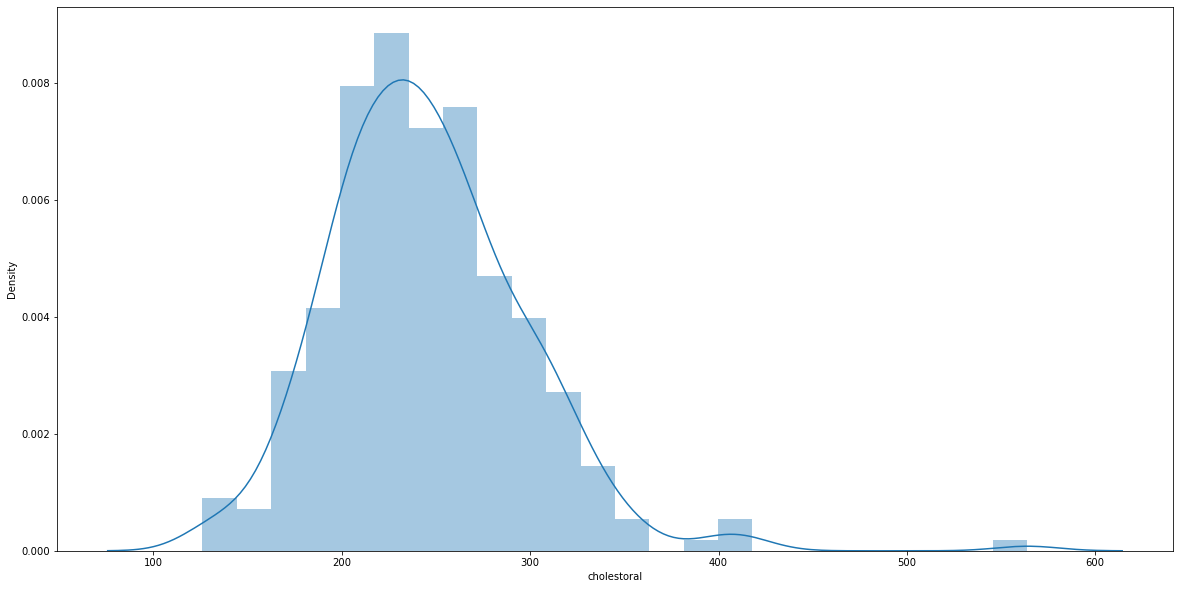

In [20]:
sns.distplot(data.cholestoral)

Gausian Distribution Type

In [21]:
data.cholestoral.describe()

count    303.000000
mean     245.248342
std       52.556550
min      126.000000
25%      210.500000
50%      240.000000
75%      274.000000
max      564.000000
Name: cholestoral, dtype: float64

In [22]:
upper_limit_2=data.cholestoral.mean() + 3*data.cholestoral.std()
lower_limit_2=data.cholestoral.mean() - 3*data.cholestoral.std()

In [23]:
upper_limit_2

402.91799064077003

In [24]:
lower_limit_2

87.57869269092947

In [25]:
data.loc[data.cholestoral>upper_limit_2]=data.cholestoral.mean()
data.loc[data.cholestoral<lower_limit_2]=data.cholestoral.mean()

In [26]:
data.cholestoral.describe()

count    303.000000
mean     242.555250
std       46.318242
min      126.000000
25%      210.500000
50%      240.000000
75%      271.000000
max      394.000000
Name: cholestoral, dtype: float64

<AxesSubplot:>

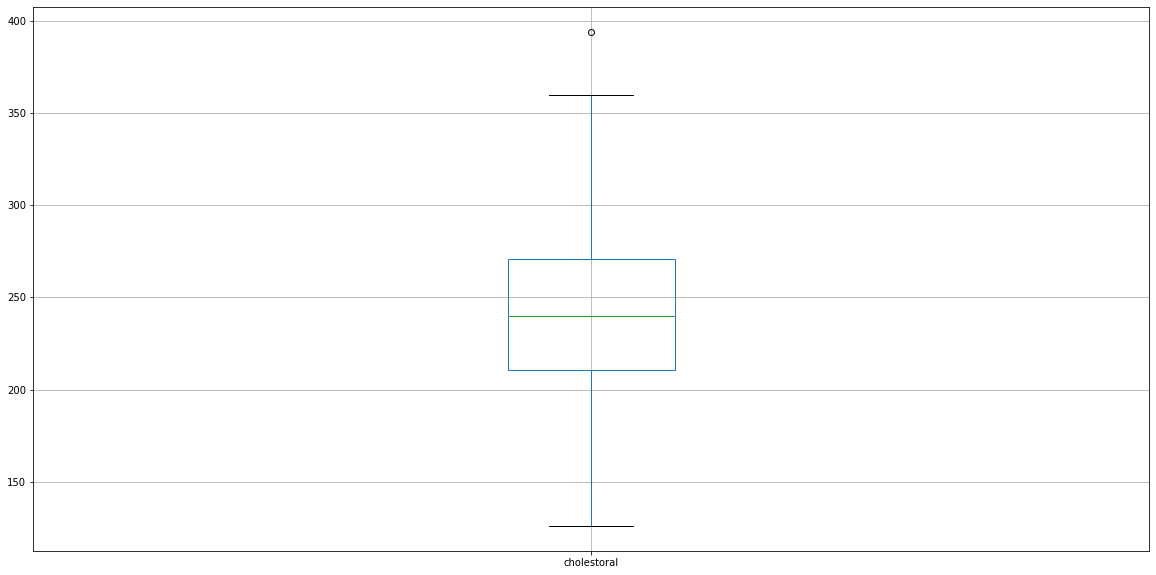

In [27]:
data.boxplot('cholestoral')

# Max_hr

<AxesSubplot:>

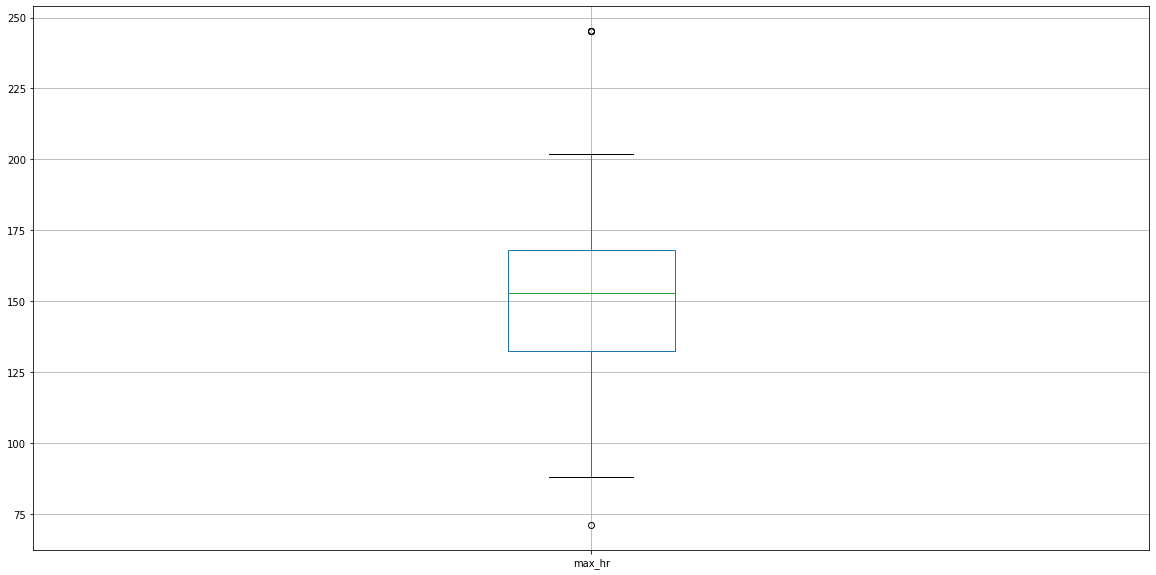

In [28]:
data.boxplot('max_hr')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_hr', ylabel='Density'>

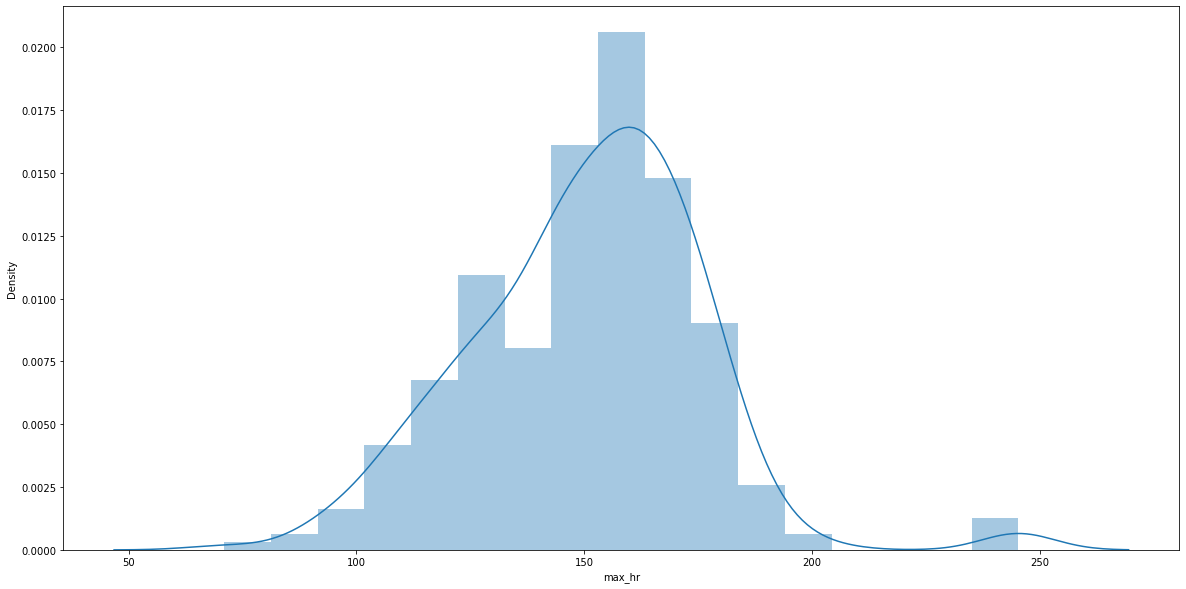

In [29]:
sns.distplot(data.max_hr)

Left Skewed Distribution

In [30]:
data.max_hr.describe()

count    303.000000
mean     150.621257
std       25.270026
min       71.000000
25%      132.500000
50%      153.000000
75%      168.000000
max      245.248342
Name: max_hr, dtype: float64

In [31]:
iqr=data.max_hr.quantile(0.75) - data.max_hr.quantile(0.25)

In [32]:
iqr

35.5

In [33]:
upper_limit_3=data.max_hr.quantile(0.75) + 3*iqr
lower_limit_3=data.max_hr.quantile(0.25) - 3*iqr

In [34]:
upper_limit_3

274.5

In [35]:
lower_limit_3

26.0

In [36]:
data.loc[data.max_hr>upper_limit_3]=data.max_hr.mean()
data.loc[data.max_hr<31]=30

In [37]:
data.max_hr.describe()

count    303.000000
mean     150.621257
std       25.270026
min       71.000000
25%      132.500000
50%      153.000000
75%      168.000000
max      245.248342
Name: max_hr, dtype: float64

<AxesSubplot:>

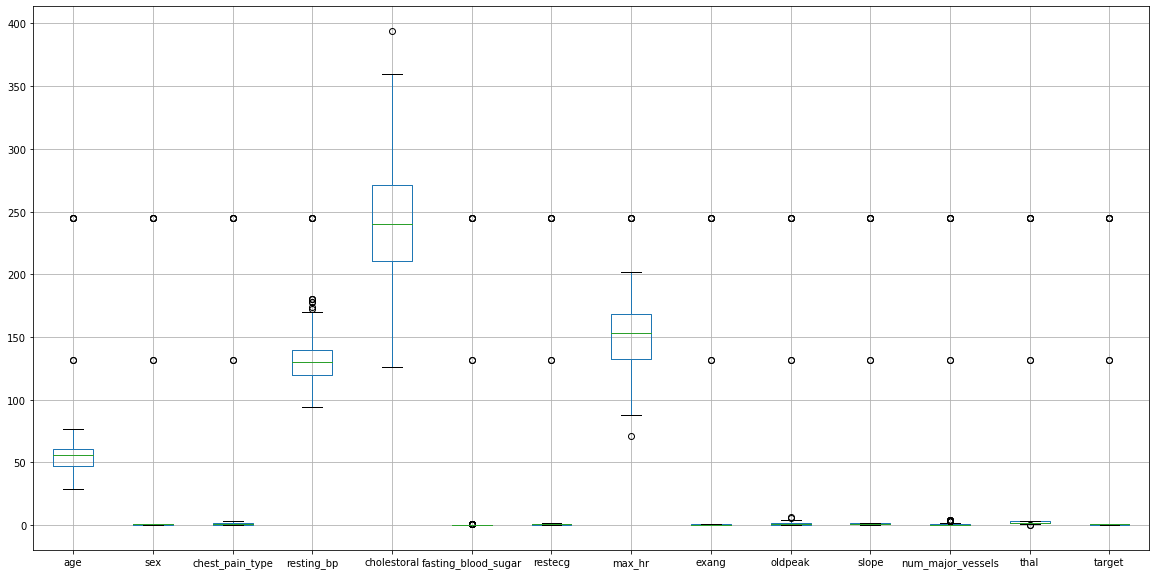

In [38]:
data.boxplot()

In [39]:
data.target.value_counts()

1.000000      163
0.000000      134
245.248342      4
131.623762      2
Name: target, dtype: int64

In [40]:
data.target.loc[data.target>1]=1

In [41]:
data.target.value_counts()

1.0    169
0.0    134
Name: target, dtype: int64

# data is balanced

In [42]:
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()

In [45]:
data=pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [46]:
data

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,0.234848,-0.127192,-0.069151,0.584300,-0.206637,-0.108855,-0.155571,-0.024625,-0.148453,-0.094324,-0.184756,-0.161392,-0.181493,0.890449
1,-0.832888,-0.127192,-0.102770,-0.125811,0.160996,-0.142367,-0.122002,1.441982,-0.148453,-0.053978,-0.184756,-0.161392,-0.147656,0.890449
2,-0.668621,-0.160785,-0.136389,-0.125811,-0.833776,-0.142367,-0.155571,0.847411,-0.148453,-0.124584,-0.117359,-0.161392,-0.147656,0.890449
3,-0.052620,-0.127192,-0.136389,-0.599218,-0.141760,-0.142367,-0.122002,1.085240,-0.148453,-0.144757,-0.117359,-0.161392,-0.147656,0.890449
4,-0.011553,-0.160785,-0.170008,-0.599218,2.410046,-0.142367,-0.122002,0.490669,-0.114916,-0.151482,-0.117359,-0.161392,-0.147656,0.890449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.011553,-0.160785,-0.170008,0.347596,-0.033633,-0.142367,-0.122002,-1.094852,-0.114916,-0.164931,-0.151057,-0.161392,-0.113820,-1.123029
299,-0.504354,-0.127192,-0.069151,-1.072624,0.463753,-0.142367,-0.122002,-0.738110,-0.148453,-0.131309,-0.151057,-0.161392,-0.113820,-1.123029
300,0.440181,-0.127192,-0.170008,0.536959,-1.071656,-0.108855,-0.122002,-0.381368,-0.148453,-0.057340,-0.151057,-0.094230,-0.113820,-1.123029
301,-0.011553,-0.127192,-0.170008,-0.125811,-2.412436,-0.142367,-0.122002,-1.411957,-0.114916,-0.131309,-0.151057,-0.127811,-0.113820,-1.123029


In [47]:
x=data.iloc[:,:-1]

In [48]:
x

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
0,0.234848,-0.127192,-0.069151,0.584300,-0.206637,-0.108855,-0.155571,-0.024625,-0.148453,-0.094324,-0.184756,-0.161392,-0.181493
1,-0.832888,-0.127192,-0.102770,-0.125811,0.160996,-0.142367,-0.122002,1.441982,-0.148453,-0.053978,-0.184756,-0.161392,-0.147656
2,-0.668621,-0.160785,-0.136389,-0.125811,-0.833776,-0.142367,-0.155571,0.847411,-0.148453,-0.124584,-0.117359,-0.161392,-0.147656
3,-0.052620,-0.127192,-0.136389,-0.599218,-0.141760,-0.142367,-0.122002,1.085240,-0.148453,-0.144757,-0.117359,-0.161392,-0.147656
4,-0.011553,-0.160785,-0.170008,-0.599218,2.410046,-0.142367,-0.122002,0.490669,-0.114916,-0.151482,-0.117359,-0.161392,-0.147656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.011553,-0.160785,-0.170008,0.347596,-0.033633,-0.142367,-0.122002,-1.094852,-0.114916,-0.164931,-0.151057,-0.161392,-0.113820
299,-0.504354,-0.127192,-0.069151,-1.072624,0.463753,-0.142367,-0.122002,-0.738110,-0.148453,-0.131309,-0.151057,-0.161392,-0.113820
300,0.440181,-0.127192,-0.170008,0.536959,-1.071656,-0.108855,-0.122002,-0.381368,-0.148453,-0.057340,-0.151057,-0.094230,-0.113820
301,-0.011553,-0.127192,-0.170008,-0.125811,-2.412436,-0.142367,-0.122002,-1.411957,-0.114916,-0.131309,-0.151057,-0.127811,-0.113820


In [49]:
y=data.iloc[:,-1]

In [50]:
y

0      0.890449
1      0.890449
2      0.890449
3      0.890449
4      0.890449
         ...   
298   -1.123029
299   -1.123029
300   -1.123029
301   -1.123029
302   -1.123029
Name: target, Length: 303, dtype: float64

# Splitting Data

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
132,-0.627555,-0.127192,-0.136389,-0.599218,1.134143,-0.142367,-0.122002,0.451031,-0.148453,-0.171655,-0.117359,-0.161392,-0.147656
202,0.029514,-0.127192,-0.170008,0.821003,0.593506,-0.142367,-0.155571,-1.570509,-0.114916,-0.144757,-0.117359,-0.161392,-0.113820
196,-0.463288,-0.127192,-0.102770,0.821003,-0.249888,-0.142367,-0.122002,-0.143540,-0.148453,-0.050615,-0.151057,-0.161392,-0.147656
75,-0.093687,-0.160785,-0.136389,0.110893,0.160996,-0.142367,-0.155571,0.411393,-0.148453,-0.124584,-0.151057,-0.161392,-0.147656
176,0.111647,-0.127192,-0.170008,-0.741240,-0.271513,-0.108855,-0.122002,0.371755,-0.114916,-0.124584,-0.117359,-0.094230,-0.113820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.299020,-0.127192,-0.102770,0.347596,-0.206637,-0.142367,-0.122002,0.490669,-0.148453,-0.151482,-0.151057,-0.127811,-0.113820
71,-0.257954,-0.127192,-0.102770,-1.830075,-0.336390,-0.142367,-0.122002,0.133927,-0.114916,-0.171655,-0.117359,-0.127811,-0.113820
106,0.481248,-0.127192,-0.069151,1.294410,-0.185011,-0.108855,-0.155571,-0.777748,-0.148453,-0.168293,-0.151057,-0.127811,-0.147656
270,-0.463288,-0.127192,-0.170008,-0.599218,0.139371,-0.142367,-0.155571,-0.262454,-0.148453,-0.144757,-0.117359,-0.161392,-0.113820


In [54]:
x_test

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal
179,-0.011553,-0.127192,-0.170008,0.821003,0.723259,-0.142367,-0.155571,-1.530871,-0.114916,-0.151482,-0.151057,-0.127811,-0.181493
228,0.070581,-0.127192,-0.069151,1.767817,0.982765,-0.142367,-0.155571,0.332117,-0.148453,-0.164931,-0.151057,-0.161392,-0.113820
111,-0.011553,-0.127192,-0.102770,0.821003,-2.520563,-0.108855,-0.122002,0.887049,-0.148453,-0.164931,-0.117359,-0.127811,-0.113820
246,7.719199,8.077829,8.075013,5.330125,0.058239,8.076228,8.076984,3.750832,8.076461,8.074128,8.079688,8.074240,8.082990
60,0.563382,-0.160785,-0.102770,-1.072624,0.485379,-0.108855,-0.155571,-0.817386,-0.148453,-0.171655,-0.117359,-0.127811,-0.147656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.481248,-0.127192,-0.102770,0.347596,0.247498,-0.142367,-0.155571,-0.183178,-0.148453,-0.104411,-0.151057,-0.060649,-0.113820
104,-0.299020,-0.127192,-0.102770,-0.173151,-1.006780,-0.142367,-0.122002,0.490669,-0.148453,-0.171655,-0.117359,-0.161392,-0.147656
300,0.440181,-0.127192,-0.170008,0.536959,-1.071656,-0.108855,-0.122002,-0.381368,-0.148453,-0.057340,-0.151057,-0.094230,-0.113820
193,0.111647,-0.127192,-0.170008,0.584300,0.853012,-0.142367,-0.155571,-0.341730,-0.114916,-0.077513,-0.151057,-0.094230,-0.113820


In [55]:
y_train

132    0.890449
202   -1.123029
196   -1.123029
75     0.890449
176   -1.123029
         ...   
188   -1.123029
71     0.890449
106    0.890449
270   -1.123029
102    0.890449
Name: target, Length: 242, dtype: float64

In [56]:
y_test

179   -1.123029
228   -1.123029
111    0.890449
246    0.890449
60     0.890449
         ...   
249   -1.123029
104    0.890449
300   -1.123029
193   -1.123029
184   -1.123029
Name: target, Length: 61, dtype: float64

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()

In [59]:
y_train=le.fit_transform(y_train)

In [60]:
y_test=le.fit_transform(y_test)

In [61]:
data.target.unique()

array([ 0.89044899, -1.12302895])

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr=LogisticRegression()

In [64]:
lr.fit(x_train,y_train)

LogisticRegression()

In [65]:
y_pred_logistic_regression=lr.predict(x_test)

In [66]:
y_pred_logistic_regression

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [68]:
accuracy_score(y_pred_logistic_regression,y_test)

0.819672131147541

In [69]:
confusion_matrix(y_pred_logistic_regression,y_test)

array([[22,  6],
       [ 5, 28]], dtype=int64)

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc=RandomForestClassifier()

In [72]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred_rfc=rfc.predict(x_test)

In [74]:
y_pred_rfc

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
accuracy_score(y_pred_rfc,y_test)

0.8688524590163934

In [76]:
confusion_matrix(y_pred_rfc,y_test)

array([[23,  4],
       [ 4, 30]], dtype=int64)

# Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt=DecisionTreeClassifier()

In [79]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
y_pred_decision_tree=dt.predict(x_test)

In [81]:
y_pred_decision_tree

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [82]:
accuracy_score(y_pred_decision_tree,y_test)

0.819672131147541

In [83]:
confusion_matrix(y_pred_decision_tree,y_test)

array([[24,  8],
       [ 3, 26]], dtype=int64)

# Ridge Clasifier

In [84]:
from sklearn.linear_model import RidgeClassifier

In [85]:
rc=RidgeClassifier()

In [86]:
rc.fit(x_train,y_train)

RidgeClassifier()

In [87]:
y_pred_rc=rc.predict(x_test)

In [88]:
y_pred_rc

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [89]:
accuracy_score(y_pred_rc,y_test)

0.8524590163934426

# Catboost Classifier

In [90]:
from catboost import CatBoostClassifier

In [91]:
cat=CatBoostClassifier()

In [92]:
cat.fit(x_train,y_train)

Learning rate set to 0.005621
0:	learn: 0.6887650	total: 139ms	remaining: 2m 18s
1:	learn: 0.6856992	total: 140ms	remaining: 1m 9s
2:	learn: 0.6816510	total: 141ms	remaining: 46.9s
3:	learn: 0.6780056	total: 142ms	remaining: 35.5s
4:	learn: 0.6743399	total: 144ms	remaining: 28.6s
5:	learn: 0.6701691	total: 145ms	remaining: 24s
6:	learn: 0.6664693	total: 146ms	remaining: 20.7s
7:	learn: 0.6616497	total: 147ms	remaining: 18.3s
8:	learn: 0.6577071	total: 148ms	remaining: 16.3s
9:	learn: 0.6532465	total: 150ms	remaining: 14.8s
10:	learn: 0.6495756	total: 151ms	remaining: 13.6s
11:	learn: 0.6471634	total: 152ms	remaining: 12.5s
12:	learn: 0.6438743	total: 153ms	remaining: 11.6s
13:	learn: 0.6408486	total: 154ms	remaining: 10.8s
14:	learn: 0.6395313	total: 155ms	remaining: 10.2s
15:	learn: 0.6353464	total: 156ms	remaining: 9.59s
16:	learn: 0.6326454	total: 157ms	remaining: 9.09s
17:	learn: 0.6292583	total: 158ms	remaining: 8.63s
18:	learn: 0.6251411	total: 160ms	remaining: 8.23s
19:	learn: 0

177:	learn: 0.3512263	total: 353ms	remaining: 1.63s
178:	learn: 0.3503715	total: 354ms	remaining: 1.63s
179:	learn: 0.3493512	total: 356ms	remaining: 1.62s
180:	learn: 0.3486165	total: 357ms	remaining: 1.62s
181:	learn: 0.3475379	total: 359ms	remaining: 1.61s
182:	learn: 0.3468819	total: 360ms	remaining: 1.61s
183:	learn: 0.3457247	total: 362ms	remaining: 1.6s
184:	learn: 0.3445491	total: 363ms	remaining: 1.6s
185:	learn: 0.3438766	total: 365ms	remaining: 1.6s
186:	learn: 0.3431949	total: 367ms	remaining: 1.59s
187:	learn: 0.3424164	total: 368ms	remaining: 1.59s
188:	learn: 0.3412969	total: 369ms	remaining: 1.58s
189:	learn: 0.3405385	total: 370ms	remaining: 1.58s
190:	learn: 0.3397419	total: 372ms	remaining: 1.57s
191:	learn: 0.3388715	total: 373ms	remaining: 1.57s
192:	learn: 0.3377723	total: 374ms	remaining: 1.56s
193:	learn: 0.3367146	total: 375ms	remaining: 1.56s
194:	learn: 0.3356472	total: 377ms	remaining: 1.55s
195:	learn: 0.3345934	total: 378ms	remaining: 1.55s
196:	learn: 0.3

468:	learn: 0.2138611	total: 699ms	remaining: 792ms
469:	learn: 0.2134903	total: 701ms	remaining: 791ms
470:	learn: 0.2131248	total: 705ms	remaining: 792ms
471:	learn: 0.2127839	total: 706ms	remaining: 790ms
472:	learn: 0.2125777	total: 708ms	remaining: 789ms
473:	learn: 0.2121185	total: 710ms	remaining: 787ms
474:	learn: 0.2118157	total: 711ms	remaining: 786ms
475:	learn: 0.2115355	total: 713ms	remaining: 785ms
476:	learn: 0.2112415	total: 715ms	remaining: 784ms
477:	learn: 0.2110445	total: 716ms	remaining: 782ms
478:	learn: 0.2107257	total: 718ms	remaining: 781ms
479:	learn: 0.2102987	total: 719ms	remaining: 779ms
480:	learn: 0.2100097	total: 721ms	remaining: 778ms
481:	learn: 0.2097431	total: 722ms	remaining: 776ms
482:	learn: 0.2095055	total: 724ms	remaining: 774ms
483:	learn: 0.2092367	total: 725ms	remaining: 773ms
484:	learn: 0.2089753	total: 726ms	remaining: 771ms
485:	learn: 0.2087812	total: 727ms	remaining: 769ms
486:	learn: 0.2086212	total: 728ms	remaining: 767ms
487:	learn: 

773:	learn: 0.1487345	total: 1.04s	remaining: 304ms
774:	learn: 0.1485635	total: 1.04s	remaining: 303ms
775:	learn: 0.1481291	total: 1.04s	remaining: 301ms
776:	learn: 0.1478385	total: 1.04s	remaining: 300ms
777:	learn: 0.1476333	total: 1.04s	remaining: 298ms
778:	learn: 0.1475312	total: 1.05s	remaining: 297ms
779:	learn: 0.1474268	total: 1.05s	remaining: 296ms
780:	learn: 0.1472994	total: 1.05s	remaining: 294ms
781:	learn: 0.1470374	total: 1.05s	remaining: 293ms
782:	learn: 0.1470252	total: 1.05s	remaining: 291ms
783:	learn: 0.1468700	total: 1.05s	remaining: 290ms
784:	learn: 0.1466906	total: 1.05s	remaining: 289ms
785:	learn: 0.1466378	total: 1.05s	remaining: 287ms
786:	learn: 0.1465725	total: 1.06s	remaining: 286ms
787:	learn: 0.1463527	total: 1.06s	remaining: 284ms
788:	learn: 0.1462282	total: 1.06s	remaining: 283ms
789:	learn: 0.1460485	total: 1.06s	remaining: 282ms
790:	learn: 0.1458912	total: 1.06s	remaining: 280ms
791:	learn: 0.1456356	total: 1.06s	remaining: 279ms
792:	learn: 

937:	learn: 0.1230796	total: 1.21s	remaining: 79.7ms
938:	learn: 0.1229189	total: 1.21s	remaining: 78.4ms
939:	learn: 0.1227457	total: 1.21s	remaining: 77.1ms
940:	learn: 0.1226113	total: 1.21s	remaining: 75.8ms
941:	learn: 0.1223985	total: 1.21s	remaining: 74.5ms
942:	learn: 0.1221927	total: 1.21s	remaining: 73.2ms
943:	learn: 0.1221245	total: 1.21s	remaining: 71.9ms
944:	learn: 0.1219860	total: 1.21s	remaining: 70.6ms
945:	learn: 0.1218115	total: 1.21s	remaining: 69.3ms
946:	learn: 0.1216739	total: 1.22s	remaining: 68.1ms
947:	learn: 0.1215265	total: 1.22s	remaining: 66.8ms
948:	learn: 0.1213390	total: 1.22s	remaining: 65.5ms
949:	learn: 0.1210161	total: 1.22s	remaining: 64.2ms
950:	learn: 0.1208457	total: 1.22s	remaining: 62.9ms
951:	learn: 0.1207746	total: 1.22s	remaining: 61.6ms
952:	learn: 0.1206178	total: 1.22s	remaining: 60.3ms
953:	learn: 0.1205071	total: 1.22s	remaining: 59ms
954:	learn: 0.1203504	total: 1.23s	remaining: 57.7ms
955:	learn: 0.1202290	total: 1.23s	remaining: 56

In [93]:
y_pred_cat=cat.predict(x_test)

In [94]:
y_pred_cat

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [95]:
accuracy_score(y_pred_cat,y_test)

0.8524590163934426

In [96]:
confusion_matrix(y_pred_cat,y_test)

array([[22,  4],
       [ 5, 30]], dtype=int64)

# Extreme Gradient Boosting(XGBOOST)

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb=XGBClassifier()

In [99]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
y_pred_xgb=xgb.predict(x_test)

In [101]:
y_pred_xgb

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [102]:
accuracy_score(y_pred_xgb,y_test)

0.8688524590163934

In [103]:
confusion_matrix(y_pred_xgb,y_test)

array([[23,  4],
       [ 4, 30]], dtype=int64)

# Linear Discriminant Analysis

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
lda=LinearDiscriminantAnalysis()

In [106]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [107]:
y_pred_LDA=lda.predict(x_test)

In [108]:
y_pred_LDA

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [109]:
accuracy_score(y_pred_LDA,y_test)

0.8524590163934426

In [110]:
confusion_matrix(y_pred_LDA,y_test)

array([[23,  5],
       [ 4, 29]], dtype=int64)

# K Neighbors Classifier

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn=KNeighborsClassifier()

In [113]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [114]:
y_pred_knn=knn.predict(x_test)

In [115]:
y_pred_knn

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [116]:
accuracy_score(y_pred_knn,y_test)

0.6721311475409836

In [117]:
print("Accuracy Score from Logistic Regression Model is= ",accuracy_score(y_pred_logistic_regression,y_test))
print("Accuracy Score from Random Forest Classification Model is= ",accuracy_score(y_pred_rfc,y_test))
print("Accuracy Score from Decision Tree Model is= ",accuracy_score(y_pred_decision_tree,y_test))
print("Accuracy Score from Ridge Classifier Model is= ",accuracy_score(y_pred_rc,y_test))
print("Accuracy Score from Catboost Classifier Model is= ",accuracy_score(y_pred_cat,y_test))
print("Accuracy Score from XGBoost Model is= ",accuracy_score(y_pred_xgb,y_test))
print("Accuracy Score from Linear Discriminant Analysis Model is= ",accuracy_score(y_pred_LDA,y_test))
print("Accuracy Score from K Neighbors Classifier Model is= ",accuracy_score(y_pred_knn,y_test))

Accuracy Score from Logistic Regression Model is=  0.819672131147541
Accuracy Score from Random Forest Classification Model is=  0.8688524590163934
Accuracy Score from Decision Tree Model is=  0.819672131147541
Accuracy Score from Ridge Classifier Model is=  0.8524590163934426
Accuracy Score from Catboost Classifier Model is=  0.8524590163934426
Accuracy Score from XGBoost Model is=  0.8688524590163934
Accuracy Score from Linear Discriminant Analysis Model is=  0.8524590163934426
Accuracy Score from K Neighbors Classifier Model is=  0.6721311475409836


# Random Forest Classifier and XGBoost Both are Performing Well